Importing Dataset

In [1]:
#Importing Libraries:
import numpy as np
import pandas as pd

In [2]:
#Reading csv file and converting it in dataframe
ds= pd.read_csv("Automobile_insurance_fraud.csv")
df=pd.DataFrame(ds)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


Dataset in Dataframe format.
It is a Classification Model

In [3]:
# Rows & Columns in dataset:

df.shape

(1000, 40)

Dataset has 1000 Rows and 40 Columns

In [4]:
# Datatype of dataset

df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

There are 21 Object datatype and 19 numeric datatype.
Target label is 'fraud_reported' which is object type.

In [5]:
# Information about Dataset:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

1 null value in _c39 column so dropping it and Count of data is 1000 in each column
Datatype: 21 are Object, 17 are int64 datatype and 2 are float64 datatype

In [3]:
#Dropping column _c39 as it has zero values

df.drop(['_c39'],axis=1,inplace=True)

In [4]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


Dropped column _c39

In [7]:
# Checking Unique values of Dataset:

column_name =df.columns.values
for column in column_name:
    print("{0}: {1}".format(column, df[column].unique()))

months_as_customer: [328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 291 162 30

property_damage: ['YES' '?' 'NO']
bodily_injuries: [1 0 2]
witnesses: [2 0 3 1]
police_report_available: ['YES' '?' 'NO']
total_claim_amount: [ 71610   5070  34650  63400   6500  64100  78650  51590  27700  42300
  87010 114920  56520   7280  46200  63120  52110  77880  72930  60400
  47160  37840  71520  98160  71500   9020   5720  69840  91650  75600
  67140  29790  77110  64800  53100  60200   5330  62300  60170  40000
  97080  51660  51120  56400  55120  62800   7290  76600  81800   7260
   4300  70510   2640  78900  56430   2400  65790  62920  69480  44280
  56300  68520  59130  82320  89700  33930  68530  68310  61290  30100
  57120  42930  51210  89400  59730   8060  72200  50800   6600   7500
   6490  60940  58300  68400  64240   4700  45120  66950  98340   5900
  70680  93720   6930  64890   5400   5600  79300  52800  28800   2970
  93480   4320  79800  74200  70590  74700  70000  81070  57720   7080
  47700  51260  70400  90000  72820  69300  76560  55440  77130  42000
  3630

Columns named property_damage,collision_type and police_report_available have one unique value as '?' so need to replace it.

# Data Pre-Processing:

## Filling " ?" data with mode values 

In [8]:
df['property_damage'].mode()

0    ?
dtype: object

mode of property_damage is ?

In [9]:
df['collision_type'].mode()

0    Rear Collision
dtype: object

mode of collision_type is Rear Collision

In [10]:
df['police_report_available'].mode()

0     ?
1    NO
dtype: object

mode of police_report_available are ? and No so will fill ? with No.

In [12]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

property_damage has 3 unique values 

Filling property_damage column with No as the highest repitition is of "?" value and 'No' is the second most repetative value.

In [5]:
# Filling '?' value in dataset with Nan Values:
df['property_damage']= df['property_damage'].replace('?','NO')
df['collision_type']=df['collision_type'].replace('?','Rear Collision')
df['police_report_available']=df['police_report_available'].replace('?','NO')

In [6]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


'?' value replaced in the dataset.

In [10]:
# replacing negative limit with positive

df['umbrella_limit']=df['umbrella_limit'].replace(-1000000,1000000)

replaced -1000000 with +1000000

In [12]:
df['umbrella_limit'].mean()

1103000.0

mean of umbrella_limit is 1103000.

In [15]:
#Replacing 0 with mean value

df['umbrella_limit']=df['umbrella_limit'].replace(0,1103000)

In [16]:
df['umbrella_limit'].unique()

array([ 1103000,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000,  1000000,  2000000], dtype=int64)

Replaced 0 with mean value

# EDA

## Visualization

In [17]:
#Importing plotting libraries:

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Target label plotting:

N    753
Y    247
Name: fraud_reported, dtype: int64


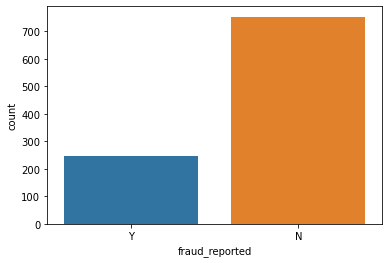

In [74]:
ax=sns.countplot(x="fraud_reported", data=df)
print(df["fraud_reported"].value_counts())

Fraud reported were 247 and not reported were 753.
Class Imbalance present.

### Numeric datatype plotting:

<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

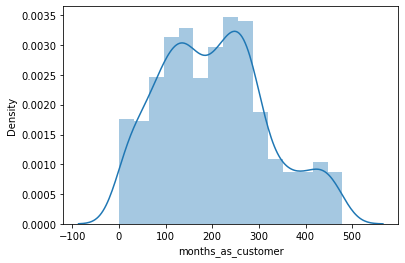

In [22]:
sns.distplot(df['months_as_customer'], kde=True)

Data is not normally distributed, skewness present

<AxesSubplot:xlabel='age', ylabel='Density'>

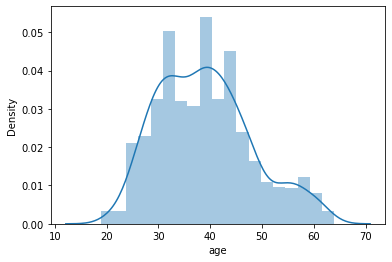

In [23]:
sns.distplot(df['age'], kde=True)

Data is not normally distributed, skewness present

<AxesSubplot:xlabel='policy_number', ylabel='Density'>

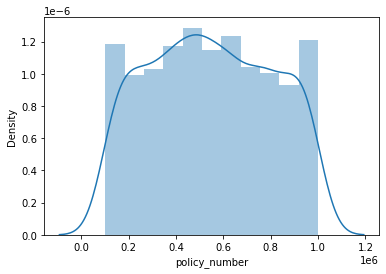

In [40]:
sns.distplot(df['policy_number'], kde=True)

Data is not normally distributed, skewness present

<AxesSubplot:xlabel='policy_deductable', ylabel='Density'>

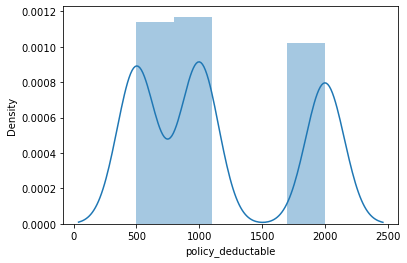

In [25]:
sns.distplot(df['policy_deductable'], kde=True)

Data is not normally distributed, skewness present

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

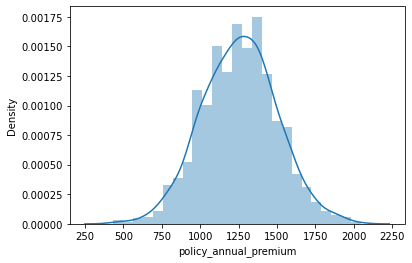

In [26]:
sns.distplot(df['policy_annual_premium'], kde=True)

Data is not normally distributed, skewness present

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

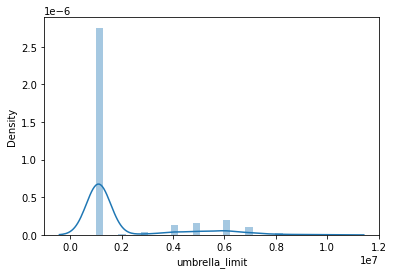

In [27]:
sns.distplot(df['umbrella_limit'], kde=True)

Data is not normally distributed, skewness present

<AxesSubplot:xlabel='insured_zip', ylabel='Density'>

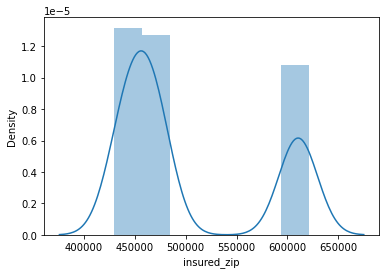

In [28]:
sns.distplot(df['insured_zip'], kde=True)

Data is not normally distributed, skewness present

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

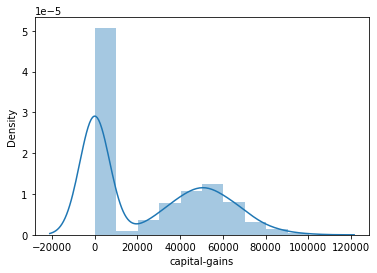

In [29]:
sns.distplot(df['capital-gains'], kde=True)

Data is not normally distributed, skewness present

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

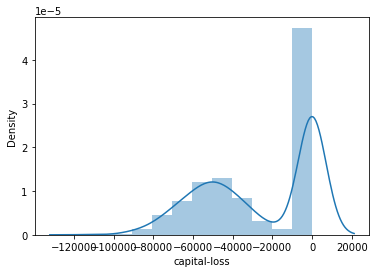

In [30]:
sns.distplot(df['capital-loss'], kde=True)

Data is not normally distributed, skewness present

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='Density'>

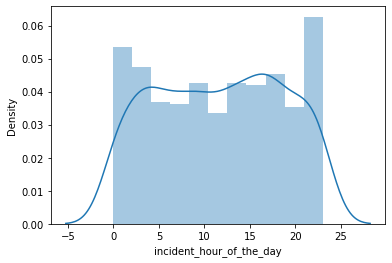

In [31]:
sns.distplot(df['incident_hour_of_the_day'], kde=True)

Data is not normally distributed, skewness present

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='Density'>

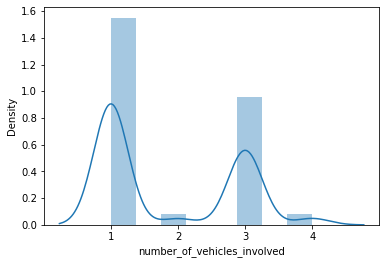

In [32]:
sns.distplot(df['number_of_vehicles_involved'], kde=True)

Data is not normally distributed, skewness present

<AxesSubplot:xlabel='bodily_injuries', ylabel='Density'>

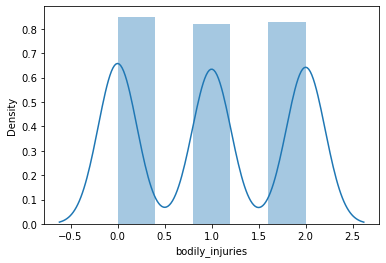

In [33]:
sns.distplot(df['bodily_injuries'], kde=True)

Data is not normally distributed, skewness present

<AxesSubplot:xlabel='witnesses', ylabel='Density'>

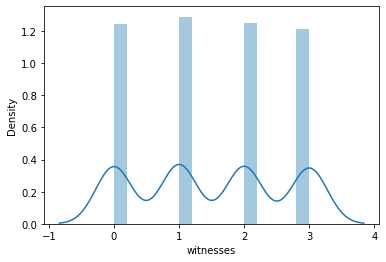

In [34]:
sns.distplot(df['witnesses'], kde=True)

Data is not normally distributed, skewness present

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

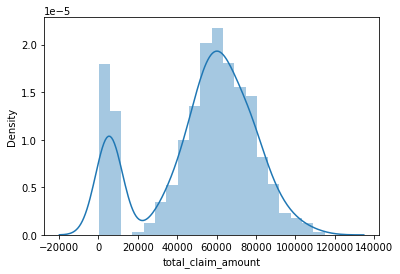

In [35]:
sns.distplot(df['total_claim_amount'], kde=True)

Data is not normally distributed, skewness present

<AxesSubplot:xlabel='injury_claim', ylabel='Density'>

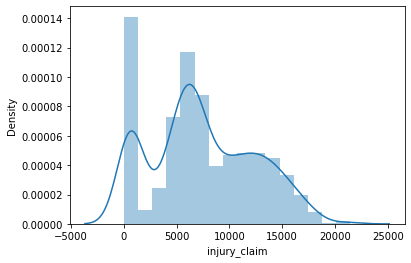

In [36]:
sns.distplot(df['injury_claim'], kde=True)

Data is not normally distributed, skewness present

<AxesSubplot:xlabel='property_claim', ylabel='Density'>

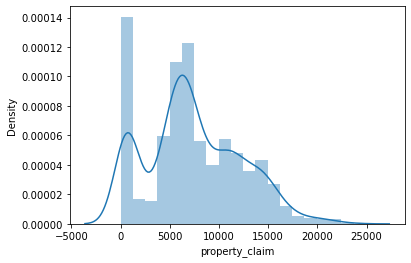

In [38]:
sns.distplot(df['property_claim'], kde=True)

Data is not normally distributed, skewness present

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

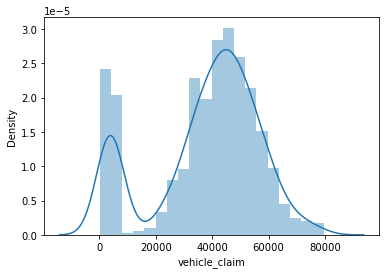

In [39]:
sns.distplot(df['vehicle_claim'], kde=True)

Data is not normally distributed, skewness present

<AxesSubplot:xlabel='auto_year', ylabel='Density'>

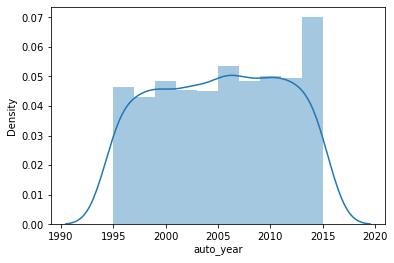

In [37]:
sns.distplot(df['auto_year'], kde=True)

Data is not normally distributed, skewness present

## Plotting categorical data

05-08-1992    3
01-01-2006    3
28-04-1992    3
19-09-1995    2
14-12-1991    2
             ..
16-12-2011    1
03-05-1991    1
11-09-2010    1
27-09-1990    1
02-06-2010    1
Name: policy_bind_date, Length: 951, dtype: int64


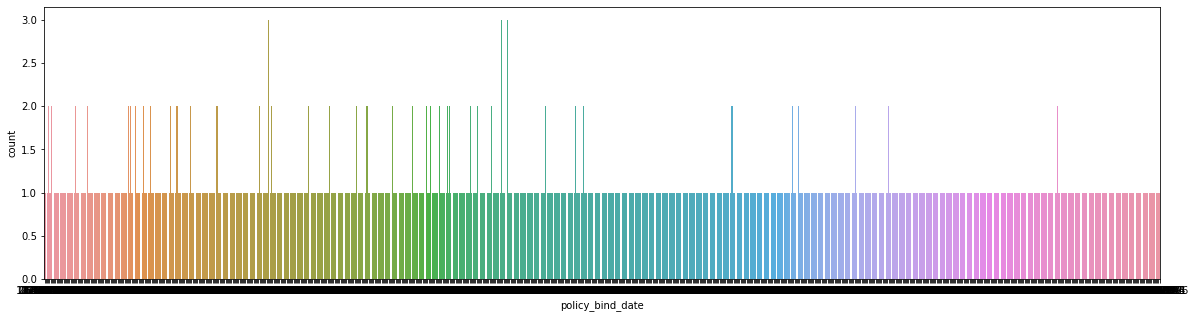

In [64]:
plt.figure(figsize=(20,5))
ax=sns.countplot(x="policy_bind_date", data=df)
print(df["policy_bind_date"].value_counts())

Ploicy binded date of 05-08-1992,01-01-2006 and 28-04-1992 have higher count.

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


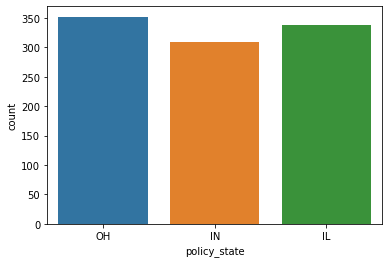

In [42]:
ax=sns.countplot(x="policy_state", data=df)
print(df["policy_state"].value_counts())

OH policy_state has higher count of 352 , then comes IL at 338 and at last IN policy_state at 310.

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


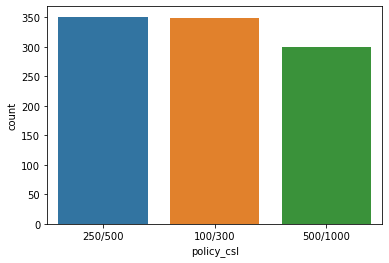

In [43]:
ax=sns.countplot(x="policy_csl", data=df)
print(df["policy_csl"].value_counts())

250/500 and 100/300 policy_csl has higher count of 351 and 349 respectively than 500/1000

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


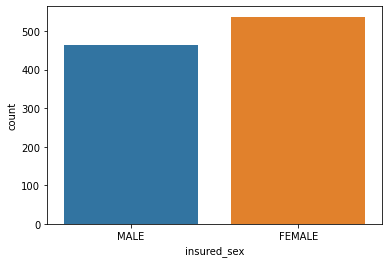

In [44]:
ax=sns.countplot(x="insured_sex", data=df)
print(df["insured_sex"].value_counts())

Female are more insured sex than male.

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


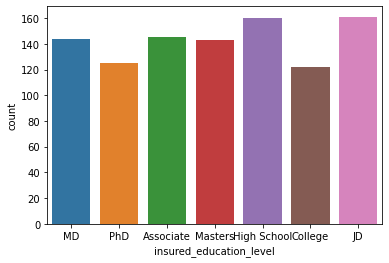

In [45]:
ax=sns.countplot(x="insured_education_level", data=df)
print(df["insured_education_level"].value_counts())

Maximum people have insured_education_level of Juniro Division and high school.

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


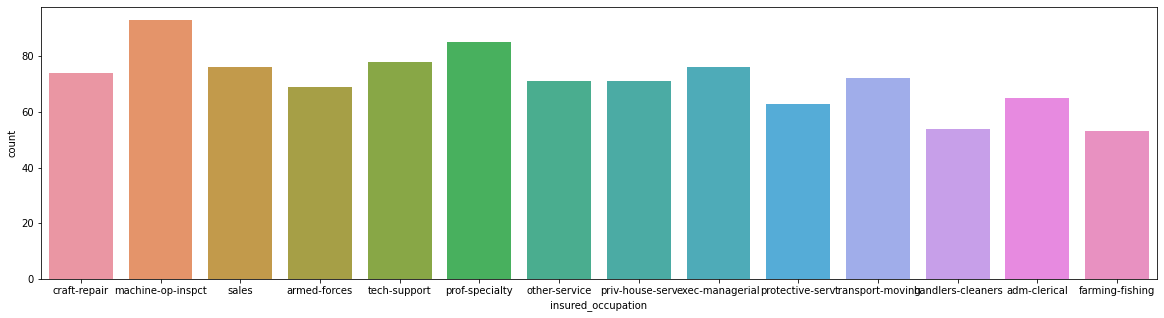

In [65]:
plt.figure(figsize=(20,5))
ax=sns.countplot(x="insured_occupation", data=df)
print(df["insured_occupation"].value_counts())

Highest count of the occupation of insured person is Machine op inspect and after that it is Prof-speciality.

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
camping           55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
base-jumping      49
skydiving         49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


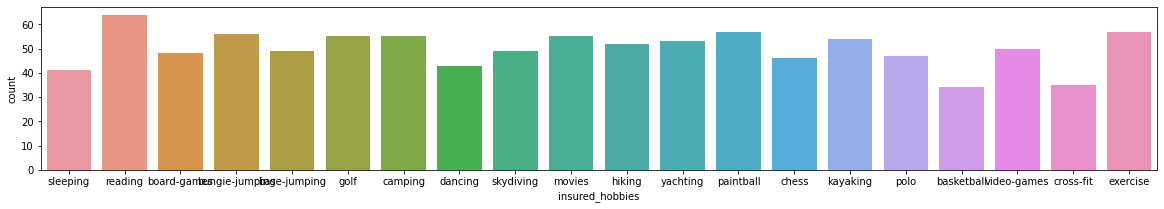

In [66]:
plt.figure(figsize=(20,3))
ax=sns.countplot(x="insured_hobbies", data=df)
print(df["insured_hobbies"].value_counts())

Highest count of the hobbies of insured person is reading,exercise and paintball.

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


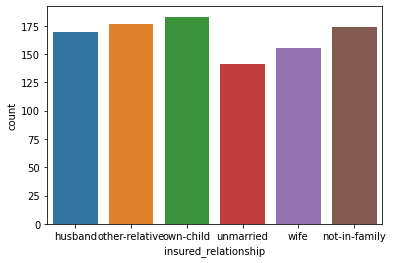

In [48]:
ax=sns.countplot(x="insured_relationship", data=df)
print(df["insured_relationship"].value_counts())

Maximum count of insured peole have relationship of own child and then other-relative.

02-02-2015    28
17-02-2015    26
07-01-2015    25
04-02-2015    24
10-01-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
06-02-2015    20
31-01-2015    20
12-02-2015    20
22-02-2015    20
21-02-2015    19
14-01-2015    19
12-01-2015    19
23-02-2015    19
21-01-2015    19
01-01-2015    19
28-02-2015    18
14-02-2015    18
03-01-2015    18
20-01-2015    18
25-02-2015    18
01-02-2015    18
18-01-2015    18
09-01-2015    17
26-02-2015    17
06-01-2015    17
24-02-2015    17
08-02-2015    17
05-02-2015    16
15-02-2015    16
13-02-2015    16
16-01-2015    16
16-02-2015    16
28-01-2015    15
18-02-2015    15
17-01-2015    15
15-01-2015    15
20-02-2015    14
27-02-2015    14
22-01-2015    14
23-01-2015    13
09-02-2015    13
27-01-2015    13
03-02-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
02-01-2015    11
29-01-2015    11
19-02-2015    10
07-02-2015    10
11-02-2015    10
10-02-2015    10
25-01-2015    10
11-01-2015    

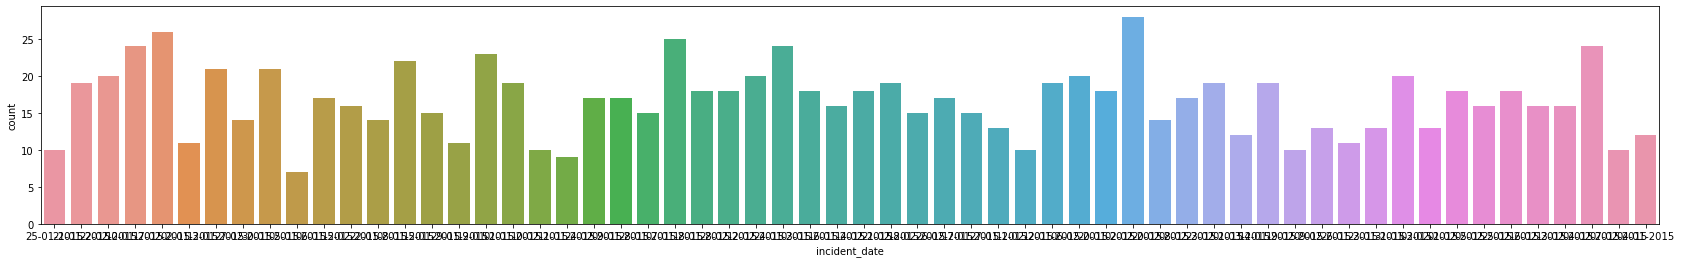

In [68]:
plt.figure(figsize=(29,4))
ax=sns.countplot(x="incident_date", data=df)
print(df["incident_date"].value_counts())

Maximum Incident happened on 02-02-2015 and after that on 17-02-2015 and 07-01-2015.

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


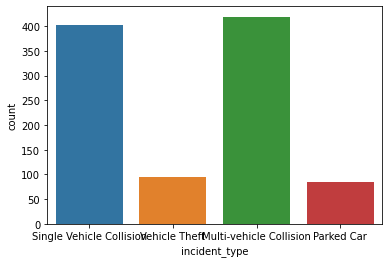

In [50]:
ax=sns.countplot(x="incident_type", data=df)
print(df["incident_type"].value_counts())

Maximum incident happened due to Multi-vehicle Collision and also by Single Vehicle Collision.

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


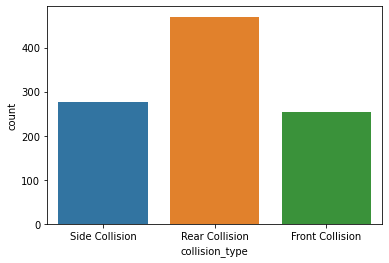

In [51]:
ax=sns.countplot(x="collision_type", data=df)
print(df["collision_type"].value_counts())

Maximum collisions were rear collision.

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


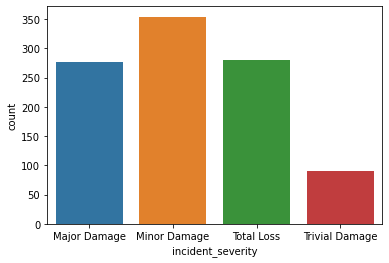

In [52]:
ax=sns.countplot(x="incident_severity", data=df)
print(df["incident_severity"].value_counts())

Incident severity majorly reported were minor damage and after that it was Total loss and Major damage.

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


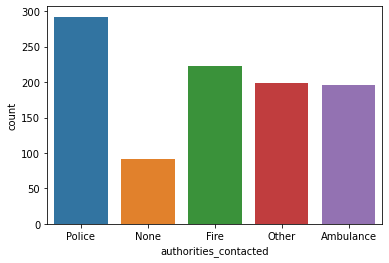

In [58]:
ax=sns.countplot(x="authorities_contacted", data=df)
print(df["authorities_contacted"].value_counts())

Majorly Police were contacted after the incident.

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


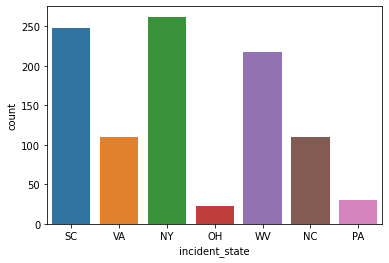

In [59]:
ax=sns.countplot(x="incident_state", data=df)
print(df["incident_state"].value_counts())

NY state has high count of incident reported then its SC state.

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


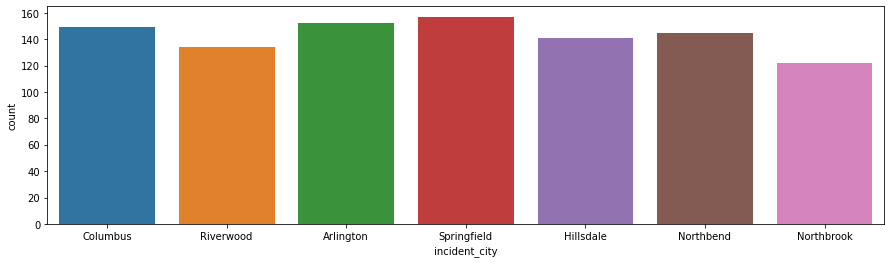

In [69]:
plt.figure(figsize=(15,4))
ax=sns.countplot(x="incident_city", data=df)
print(df["incident_city"].value_counts())

Spingfield city has highest incident reported and after that its Arlington and Hillsdale.

2654 Elm Drive           1
4154 Lincoln Hwy         1
7295 Tree Hwy            1
7930 Texas Ave           1
4876 Washington Drive    1
                        ..
6604 Apache Drive        1
3797 Solo Lane           1
6408 Weaver Ridge        1
2311 4th St              1
5969 Francis St          1
Name: incident_location, Length: 1000, dtype: int64


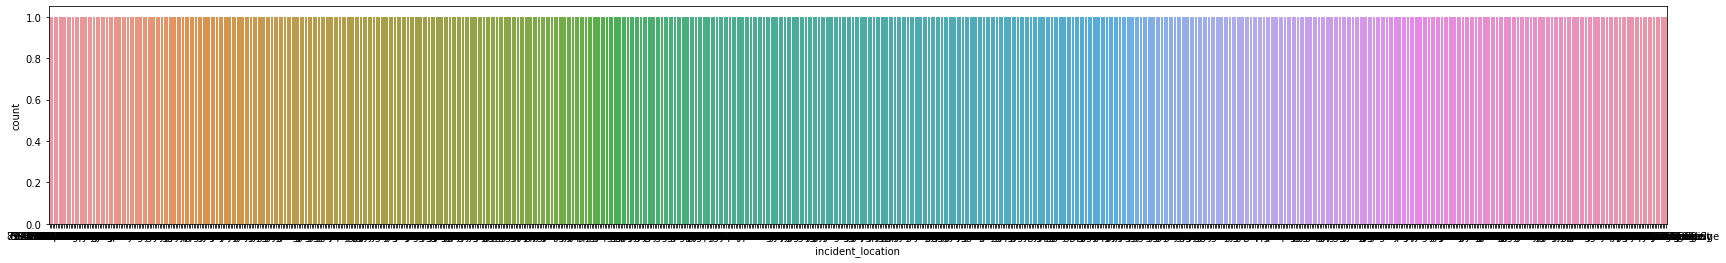

In [70]:
plt.figure(figsize=(29,4))
ax=sns.countplot(x="incident_location", data=df)
print(df["incident_location"].value_counts())

Every incident location is unique.

NO     698
YES    302
Name: property_damage, dtype: int64


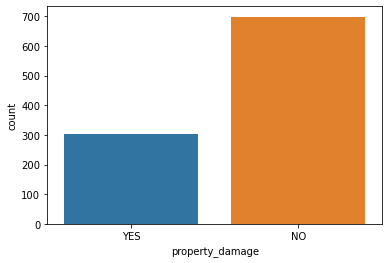

In [62]:
ax=sns.countplot(x="property_damage", data=df)
print(df["property_damage"].value_counts())

698 people have reported of no property damage.

NO     686
YES    314
Name: police_report_available, dtype: int64


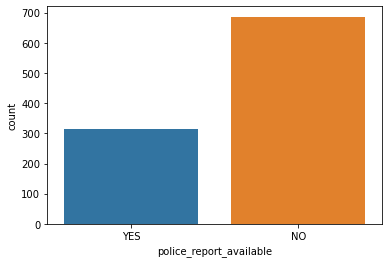

In [57]:
ax=sns.countplot(x="police_report_available", data=df)
print(df["police_report_available"].value_counts())

686 people do not have police report avaliable with them.

Suburu        80
Dodge         80
Saab          80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


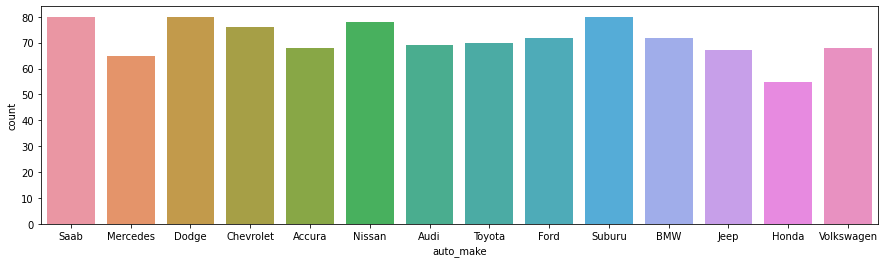

In [71]:
plt.figure(figsize=(15,4))
ax=sns.countplot(x="auto_make", data=df)
print(df["auto_make"].value_counts())

Maximum incidents cars are of Suburu , Dodge and Saab company.

RAM               43
Wrangler          42
Neon              37
A3                37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
Forrestor         28
Camry             28
92x               28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Tahoe             24
Escape            24
Maxima            24
X5                23
Ultima            23
Civic             22
Silverado         22
Highlander        22
Fusion            21
CRV               20
Impreza           20
TL                20
ML350             20
Corolla           20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


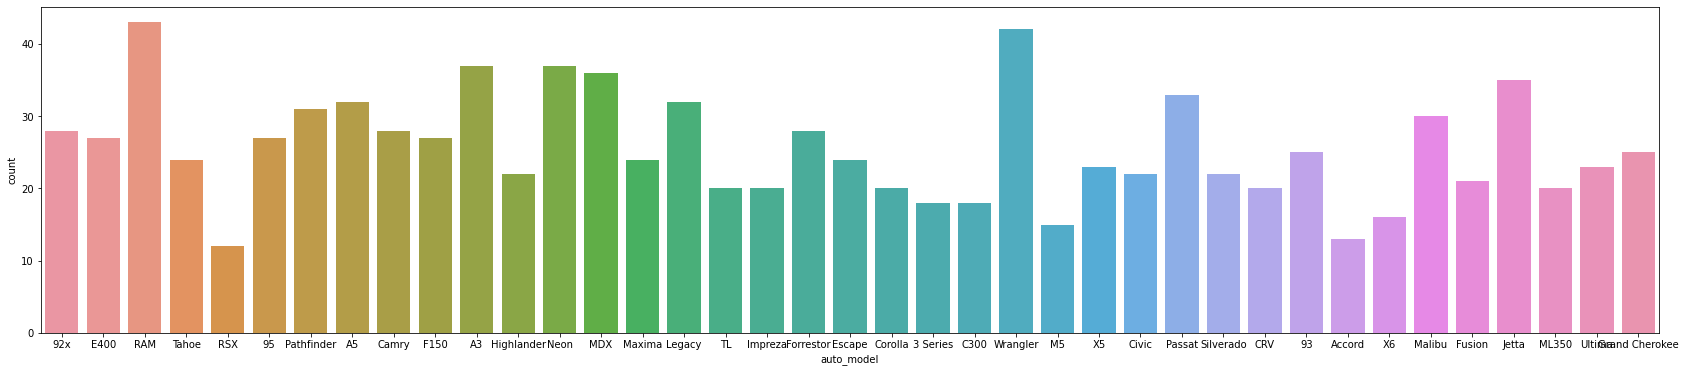

In [73]:
plt.figure(figsize=(29,6))
ax=sns.countplot(x="auto_model", data=df)
print(df["auto_model"].value_counts())

Maximum auto_model are of RAM and wrangler .

<AxesSubplot:xlabel='incident_date', ylabel='count'>

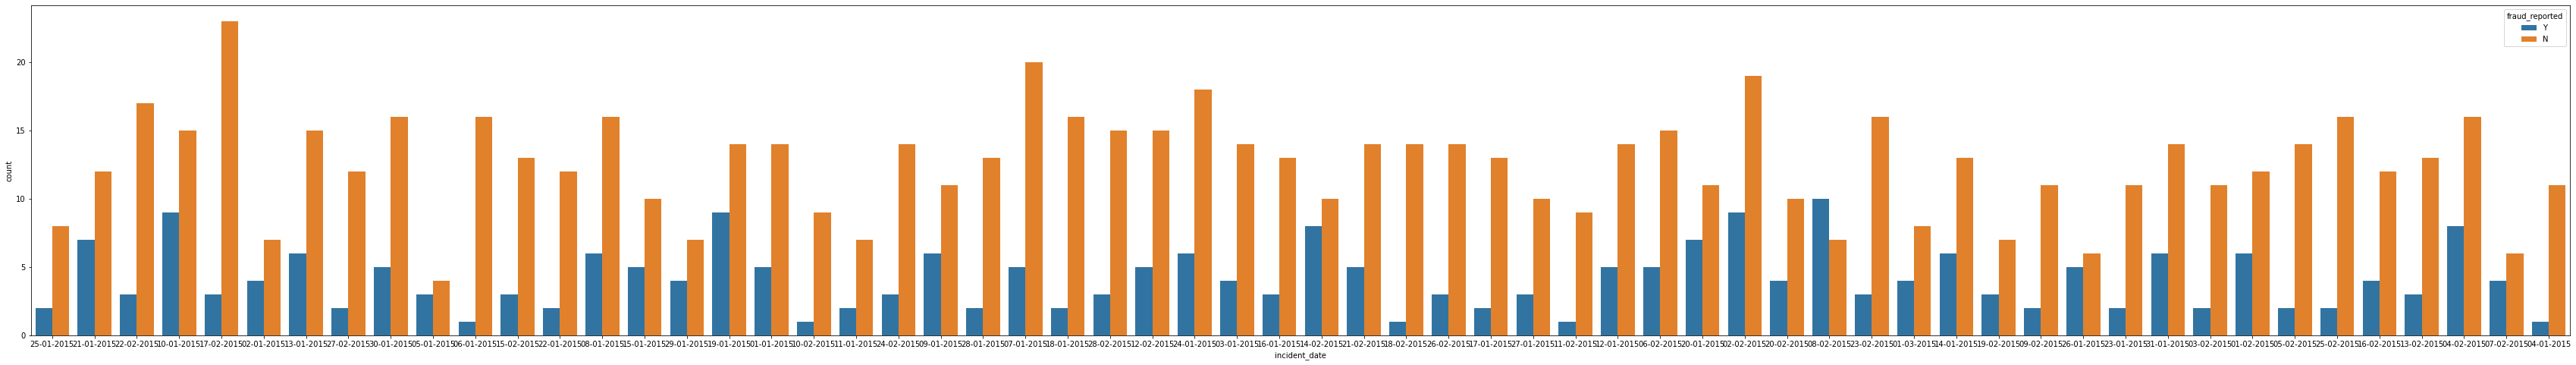

In [80]:
plt.figure(figsize=(60,8))
sns.countplot(x='incident_date', hue='fraud_reported', data = df)

08-02-2015 has repoted maximum incident.

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

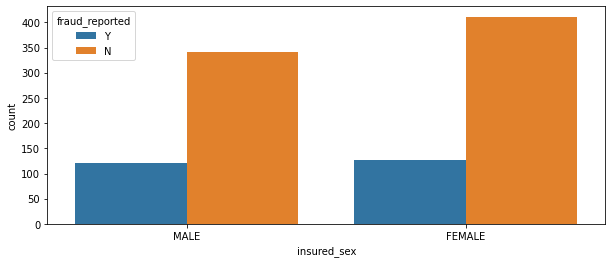

In [81]:
plt.figure(figsize=(10,4))
sns.countplot(x='insured_sex', hue='fraud_reported', data = df)

Both Male and Female have reported fraud equally between 100 and 150. Mjaorly Female have not reported frauds.

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='count'>

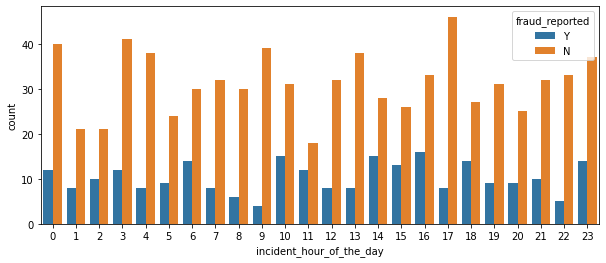

In [82]:
plt.figure(figsize=(10,4))
sns.countplot(x='incident_hour_of_the_day', hue='fraud_reported', data = df)

Maximum incidents were not reported on 17th hour of the day

<AxesSubplot:xlabel='incident_state', ylabel='count'>

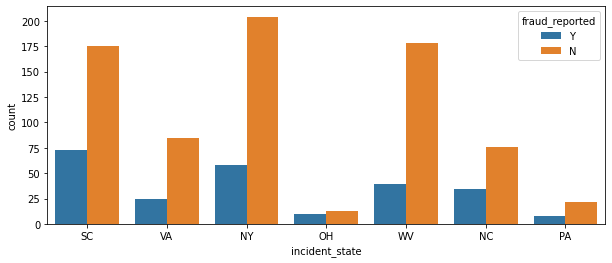

In [85]:
plt.figure(figsize=(10,4))
sns.countplot(x='incident_state', hue='fraud_reported', data = df)

Maximum state not reporting fraus is NY and the state reporting fraud is SC.

<AxesSubplot:xlabel='incident_type', ylabel='count'>

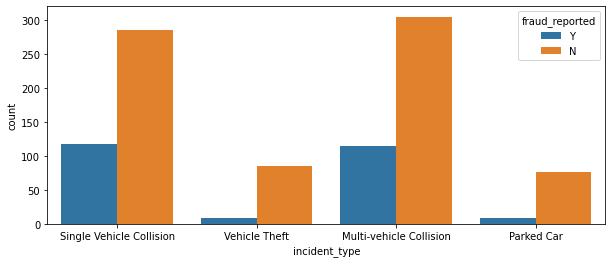

In [93]:
plt.figure(figsize=(10,4))
sns.countplot(x='incident_type', hue='fraud_reported', data = df)

Maximum reported fraud were due to multivehicle coliision and single vehicle collision and the number of fraud not reported were of multivehicle coliision and single vehicle collision.

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

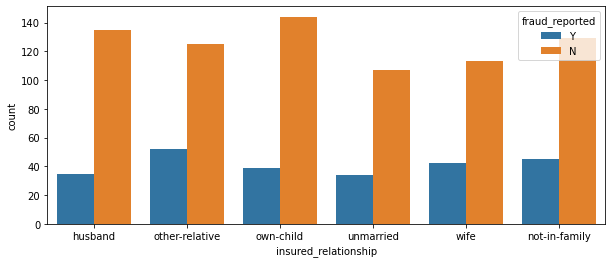

In [95]:
plt.figure(figsize=(10,4))
sns.countplot(x='insured_relationship', hue='fraud_reported', data = df)

Maximum fraud not reported were of the people owning child.

## Label Encoding:

In [96]:
# Label Encoding for object to numeric datatype:
from sklearn.preprocessing import LabelEncoder
en= LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=en.fit_transform(df[i].values.reshape(-1,1))

In [97]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,1103000,466132,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,0,31,2009,0


Encoded object to numeric datatype

## Using SMOTE for Class Imbalance:

In [98]:
# Importing Libraries
import sklearn
!pip install scikit-learn
!pip install -U imbalanced-learn

In [99]:
# SMOTE method :
from imblearn.over_sampling import SMOTE
dx=df.drop(['fraud_reported'], axis=1)
dy=df['fraud_reported'].values
smt=SMOTE()
trainx,trainy=smt.fit_resample(dx,dy)

SMOTE Technique helped to balance the target class.

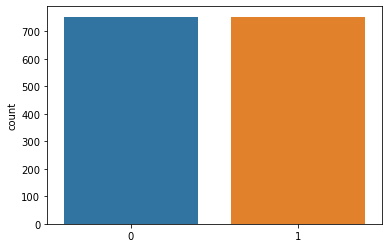

In [100]:
ax=sns.countplot(trainy)

Class Imbalance is corrected.

In [101]:
fraud_reported=pd.DataFrame(trainy)
fraud_reported.value_counts()

0    753
1    753
dtype: int64

Now count is 753 for both the value of 0 and 1.

In [102]:
# Adding New value of Loan_Status in the df dataset as Attritions
df['Fraud_Reported']=fraud_reported
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Fraud_Reported
0,328,48,521585,532,2,1,1000,1406.91,1103000,466132,...,1,71610,6510,13020,52080,10,1,2004,1,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,5070,780,780,3510,8,12,2007,1,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,0,34650,7700,3850,23100,4,30,2007,0,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,0,63400,6340,6340,50720,3,34,2014,1,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,0,6500,1300,650,4550,0,31,2009,0,0


New column named Fraud_Reported is added

## Dropping old value of fraud_reported

In [103]:
df.drop(['fraud_reported'],axis=1,inplace=True)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Fraud_Reported
0,328,48,521585,532,2,1,1000,1406.91,1103000,466132,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,0,31,2009,0


Dropped fraud_reported column.

## Describing the dataset

In [104]:
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Fraud_Reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.983194e+06,501214.488000,...,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,275.402851,0.83096,0.804516,611.864673,244.167395,1.877850e+06,71701.610941,...,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,0.000000,0.00000,0.000000,500.000000,433.330000,1.000000e+06,430104.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,233.750000,0.00000,0.000000,500.000000,1089.607500,1.103000e+06,448404.500000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,1.103000e+06,466445.500000,...,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,713.250000,2.00000,2.000000,2000.000000,1415.695000,1.103000e+06,603251.000000,...,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,...,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


Key Observations:

    1. Mean and Median: Values of mean and median are higher and lower for both so skewness is present. 
    2. 75% percentile and max: age, policy_annual_premium, umbrella_limit, property_claim and fraud_reported have outliers
    3. Standard deviation is less than mean so high peak data

<AxesSubplot:>

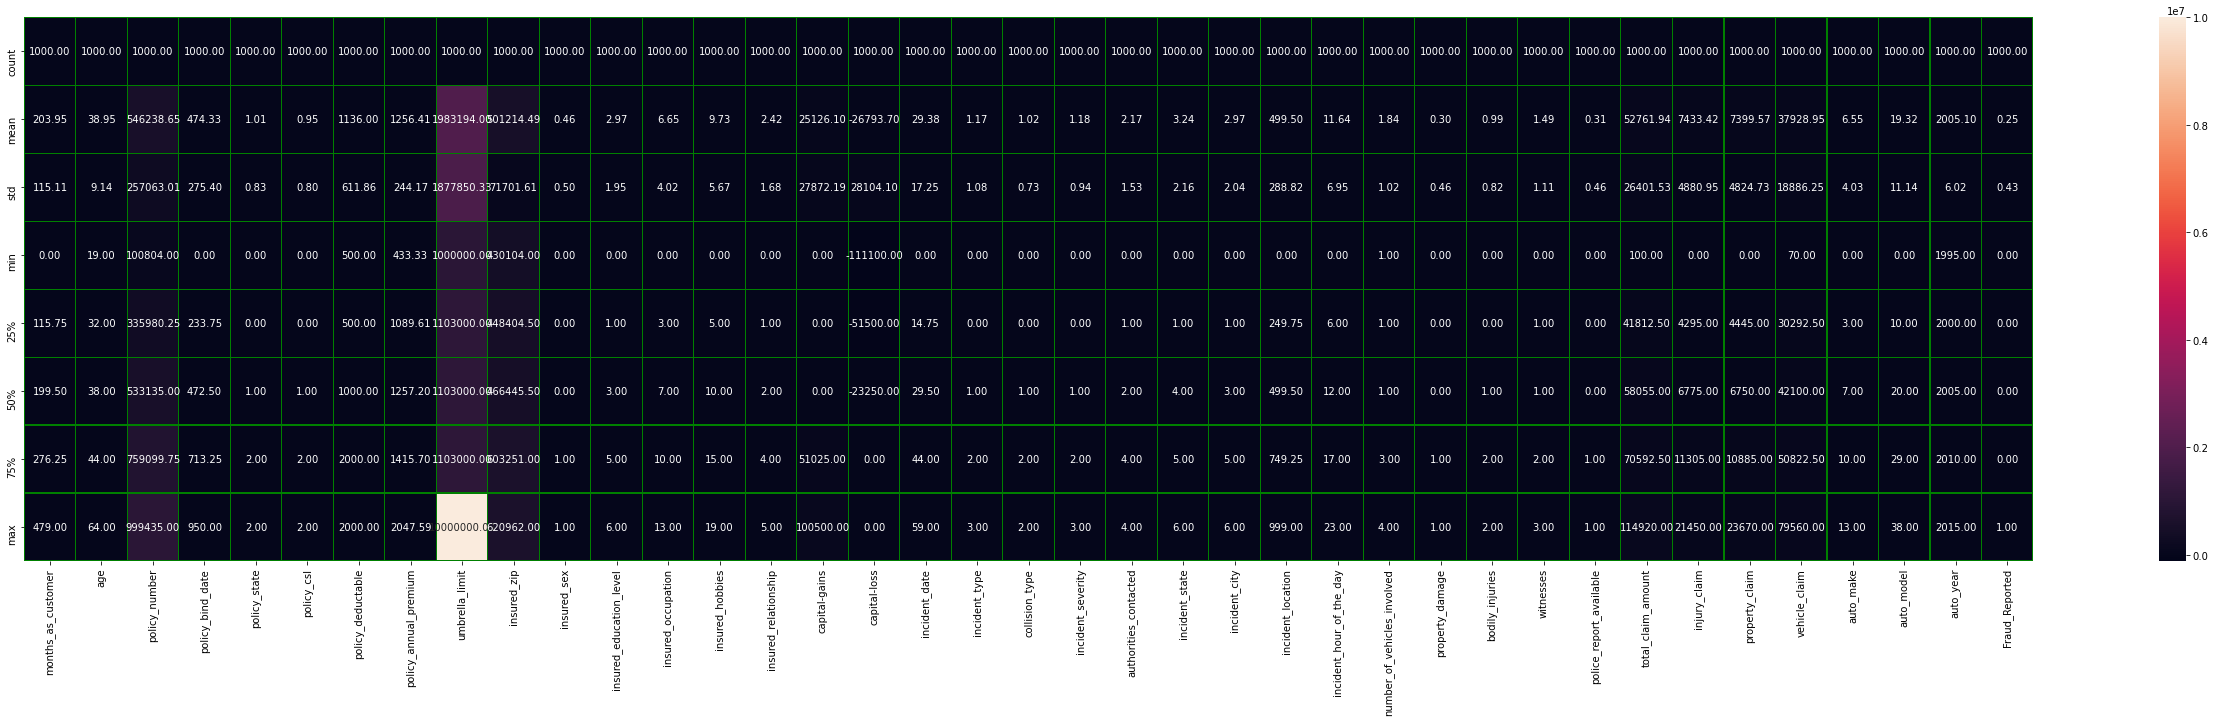

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize=(45,10))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="Green",fmt="0.2f")

Heatmap representation of dataset description

## Outliers:

months_as_customer                AxesSubplot(0.125,0.816017;0.168478x0.0639831)
age                            AxesSubplot(0.327174,0.816017;0.168478x0.0639831)
policy_number                  AxesSubplot(0.529348,0.816017;0.168478x0.0639831)
policy_bind_date               AxesSubplot(0.731522,0.816017;0.168478x0.0639831)
policy_state                      AxesSubplot(0.125,0.739237;0.168478x0.0639831)
policy_csl                     AxesSubplot(0.327174,0.739237;0.168478x0.0639831)
policy_deductable              AxesSubplot(0.529348,0.739237;0.168478x0.0639831)
policy_annual_premium          AxesSubplot(0.731522,0.739237;0.168478x0.0639831)
umbrella_limit                    AxesSubplot(0.125,0.662458;0.168478x0.0639831)
insured_zip                    AxesSubplot(0.327174,0.662458;0.168478x0.0639831)
insured_sex                    AxesSubplot(0.529348,0.662458;0.168478x0.0639831)
insured_education_level        AxesSubplot(0.731522,0.662458;0.168478x0.0639831)
insured_occupation          

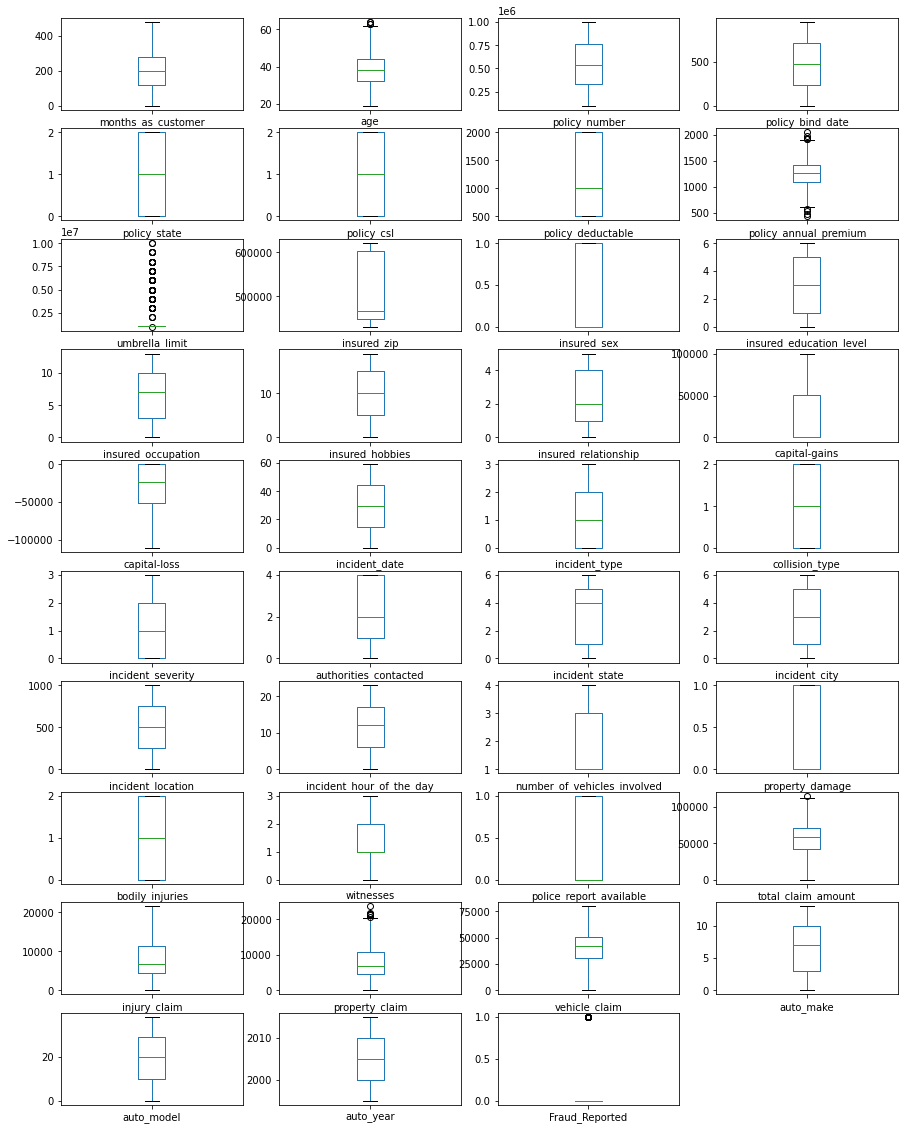

In [108]:
#Outliers:

df.plot(kind='box',subplots=True,layout=(10,4),figsize=(15,20))

age, policy_annual_premium, umbrella_limit, property_claim and fraud_reported have outliers

In [109]:
# Removing Outliers: 

from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 807, 875, 922, 975], dtype=int64),
 array([ 8,  8,  8,  8,  8,  7,  7,  8,  8,  8,  8, 33,  8,  8,  8,  7, 16,
         8,  8,  8], dtype=int64))

In [110]:
#removing value greater than threshold value 

df_new=df[(z<3).all(axis=1)]
df_new

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Fraud_Reported
0,328,48,521585,532,2,1,1000,1406.91,1103000,466132,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,1103000,431289,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,129,0,0,1000,1436.79,1103000,608177,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,3,1,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,1,1,46980,5220,5220,36540,1,5,1998,0


Outliers removed.

In [111]:
df=df_new

In [112]:
df.shape

(980, 39)

Rows: 27783, Columns: 15

### Percentage Loss of data

In [113]:
Data_loss=((1000-980)/1000)*100
Data_loss

2.0

2% data lost

## Correlation of the columns with the target columns:

In [114]:
df.corr()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Fraud_Reported
months_as_customer,1.000000,0.922960,0.061267,0.055337,-0.007183,-0.021855,0.031041,-0.003814,0.021986,0.029572,...,0.063574,-0.017200,0.058761,0.065062,0.036660,0.055941,0.049734,0.005130,0.000869,0.021285
age,0.922960,1.000000,0.062332,0.057015,-0.020012,-0.013323,0.032036,0.005330,0.017897,0.035864,...,0.056360,-0.018135,0.067812,0.077149,0.062375,0.058918,0.033757,0.015322,0.005594,0.013279
policy_number,0.061267,0.062332,1.000000,0.054617,0.071343,0.042129,-0.009812,0.028686,0.001642,0.004531,...,-0.005587,0.024546,-0.016199,-0.006386,-0.011147,-0.018152,0.016494,0.064599,-0.005574,-0.036887
policy_bind_date,0.055337,0.057015,0.054617,1.000000,0.015488,0.003408,0.001466,-0.041670,-0.021042,-0.044430,...,-0.010445,-0.009476,0.005666,0.012931,0.000816,0.004359,-0.020202,0.004594,0.033187,0.061472
policy_state,-0.007183,-0.020012,0.071343,0.015488,1.000000,0.001653,0.017612,0.015089,-0.011524,0.020669,...,0.025838,0.065316,-0.014693,-0.048188,-0.006420,-0.006411,0.010259,-0.018008,-0.001160,0.034587
policy_csl,-0.021855,-0.013323,0.042129,0.003408,0.001653,1.000000,0.009912,0.032654,0.013657,0.005593,...,0.071361,-0.008979,-0.054128,-0.080098,-0.042876,-0.043987,-0.009395,0.042905,-0.030370,-0.032509
policy_deductable,0.031041,0.032036,-0.009812,0.001466,0.017612,0.009912,1.000000,-0.008300,0.016229,-0.004399,...,0.071709,0.036275,0.023835,0.038459,0.071031,0.005279,-0.028032,-0.002591,0.030569,0.015774
policy_annual_premium,-0.003814,0.005330,0.028686,-0.041670,0.015089,0.032654,-0.008300,1.000000,-0.015864,0.047651,...,0.003433,0.032413,-0.000223,-0.024119,-0.014073,0.009521,0.009311,-0.038226,-0.042446,-0.012686
umbrella_limit,0.021986,0.017897,0.001642,-0.021042,-0.011524,0.013657,0.016229,-0.015864,1.000000,0.005523,...,-0.000393,-0.033797,-0.048435,-0.047016,-0.022092,-0.049892,0.010911,0.016459,0.029988,0.042363
insured_zip,0.029572,0.035864,0.004531,-0.044430,0.020669,0.005593,-0.004399,0.047651,0.005523,1.000000,...,0.016142,0.004121,-0.035357,-0.019463,-0.007904,-0.042364,-0.020518,0.021858,-0.041291,0.009699


correlation of input with target variable Income

<AxesSubplot:>

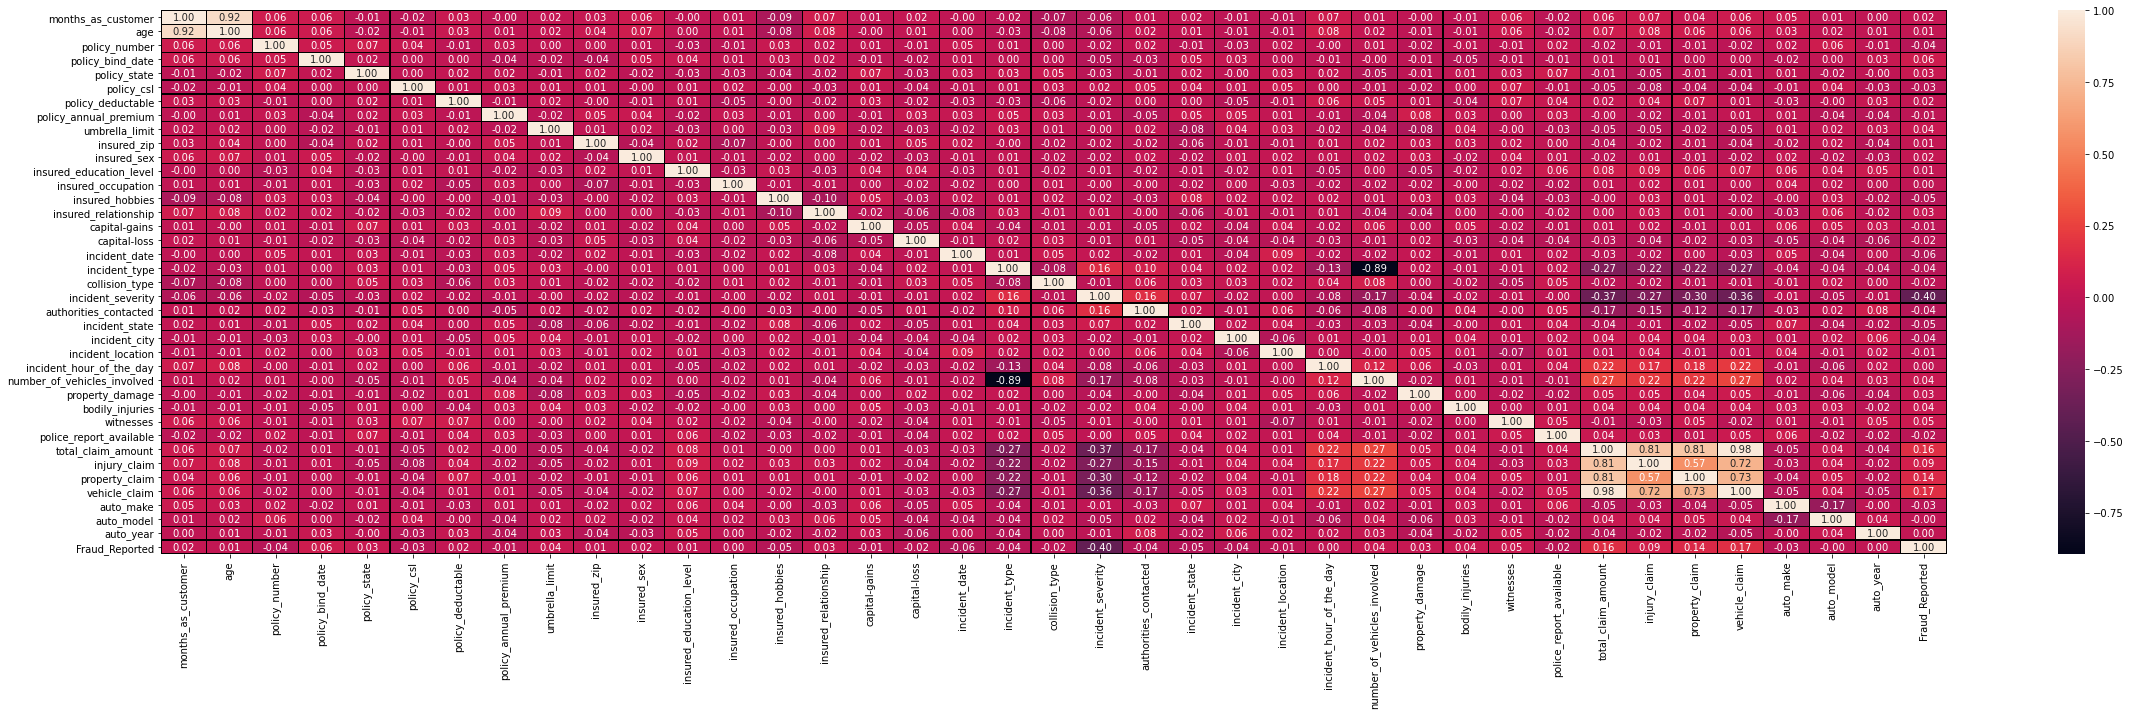

In [116]:
plt.figure(figsize=(40,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="Black",fmt="0.2f")

Key Observation:

    1. Fraud Reported have positive correlation with vehicle claim and negative correlation with incident_severity.
    2. vehicle claim has positive correlation with total_claim_amount and negative correlation with incident_severity.
    3. Multicollinearity exist

## Separating Target and feature variables

In [117]:
x = df.drop("Fraud_Reported",axis=1)
y = df["Fraud_Reported"]

### Multicollinearity removal using VIF

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

VIF technique is used to remove Multicollinearity.

In [120]:
vif_calc()

    VIF Factor                     features
0    28.586365           months_as_customer
1   131.580801                          age
2     5.676778                policy_number
3     4.059061             policy_bind_date
4     2.602218                 policy_state
5     2.456700                   policy_csl
6     4.648897            policy_deductable
7    29.203092        policy_annual_premium
8     2.315156               umbrella_limit
9    51.743236                  insured_zip
10    1.921024                  insured_sex
11    3.444385      insured_education_level
12    3.818090           insured_occupation
13    4.122875              insured_hobbies
14    3.224704         insured_relationship
15    1.886045                capital-gains
16    1.986129                 capital-loss
17    4.052639                incident_date
18   11.281304                incident_type
19    3.104052               collision_type
20    3.099338            incident_severity
21    3.229656        authoritie

## Data Cleaning:

In [124]:
x.drop(['age','months_as_customer','policy_annual_premium','insured_zip','incident_type','auto_year'],axis=1,inplace=True)
x.head()

,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model
0,521585,532,2,1,1000,1103000,1,4,2,17,...,1,1,2,1,71610,6510,13020,52080,10,1
1,342868,821,1,1,2000,5000000,1,4,6,15,...,0,0,0,0,5070,780,780,3510,8,12
2,687698,186,2,0,2000,5000000,0,6,11,2,...,0,2,3,0,34650,7700,3850,23100,4,30
3,227811,766,0,1,2000,6000000,0,6,1,2,...,0,1,2,0,63400,6340,6340,50720,3,34
4,367455,181,0,2,1000,6000000,1,0,11,2,...,0,0,1,0,6500,1300,650,4550,0,31


age,months_as_customer,policy_annual_premium,insured_zip,incident_type,auto_year and number_of_vehicles_involved have high vif value so dropping them but number_of_vehicles_involved have correlation with target label so not dropping it. 

In [125]:
x.drop(['insured_hobbies'],axis=1,inplace=True)
x.head()

,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model
0,521585,532,2,1,1000,1103000,1,4,2,0,...,1,1,2,1,71610,6510,13020,52080,10,1
1,342868,821,1,1,2000,5000000,1,4,6,2,...,0,0,0,0,5070,780,780,3510,8,12
2,687698,186,2,0,2000,5000000,0,6,11,3,...,0,2,3,0,34650,7700,3850,23100,4,30
3,227811,766,0,1,2000,6000000,0,6,1,4,...,0,1,2,0,63400,6340,6340,50720,3,34
4,367455,181,0,2,1000,6000000,1,0,11,4,...,0,0,1,0,6500,1300,650,4550,0,31


dropped insured_hobbies column

## Skewness:

In [126]:
x.skew()

policy_number                  0.036283
policy_bind_date               0.006386
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
umbrella_limit                 1.908011
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_date                  0.002604
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_location             -0.003369
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage                0.853093
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.796221


Taking range of skewness between +/- 0.5
umbrella_limit ,police_report_available,vehicle_claim and property_damage has skewness so need to fix it.

In [127]:
# Using power_transform to remove skewness.
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.02347493,  0.29902129,  1.14147704, ...,  0.7581298 ,
         0.85481164, -1.80721231],
       [-0.74401221,  1.1824092 ,  0.05900219, ..., -1.78748531,
         0.41187331, -0.57848628],
       [ 0.58680474, -0.99804174,  1.14147704, ..., -0.82024583,
        -0.56458381,  0.9504262 ],
       ...,
       [ 1.37172562,  0.22317302,  1.14147704, ...,  0.78172811,
         1.06823592,  0.05320514],
       [ 0.02357929,  0.43183104, -1.26576425, ..., -0.10201672,
        -1.44793034, -1.29996796],
       [ 0.10716503, -0.30029896,  1.14147704, ..., -1.77993883,
         0.41187331, -0.57848628]])

Used power_transform to remove skewness.

In [128]:
# converting ndarray to dataframe
x=pd.DataFrame(x)

In [129]:
x.skew()

0    -0.161791
1    -0.293677
2    -0.150765
3    -0.096814
4     0.022179
5     0.000000
6     0.139324
7    -0.187642
8    -0.238129
9    -0.160168
10    0.031294
11    0.088750
12   -0.264010
13   -0.129037
14   -0.079569
15   -0.223816
16   -0.256064
17   -0.181833
18   -0.288690
19   -0.258027
20    0.372833
21    0.853093
22   -0.133824
23   -0.151669
24    0.796221
25   -0.508540
26   -0.416732
27   -0.357397
28   -0.521805
29   -0.229846
30   -0.276099
dtype: float64

skewness fixed

## Scaling using Standard Scaler

In [130]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.02347493,  0.29902129,  1.14147704, ...,  0.7581298 ,
         0.85481164, -1.80721231],
       [-0.74401221,  1.1824092 ,  0.05900219, ..., -1.78748531,
         0.41187331, -0.57848628],
       [ 0.58680474, -0.99804174,  1.14147704, ..., -0.82024583,
        -0.56458381,  0.9504262 ],
       ...,
       [ 1.37172562,  0.22317302,  1.14147704, ...,  0.78172811,
         1.06823592,  0.05320514],
       [ 0.02357929,  0.43183104, -1.26576425, ..., -0.10201672,
        -1.44793034, -1.29996796],
       [ 0.10716503, -0.30029896,  1.14147704, ..., -1.77993883,
         0.41187331, -0.57848628]])

Scaling of feature label done.

# Model Selection :

## Logistic Regression:

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [132]:
l=[]
for i in range(0,1000):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(train_x,train_y)
    pred_train=lr.predict(train_x)
    pred_test=lr.predict(test_x)
    # 
    if round(accuracy_score(train_y,pred_train)*100,1)==round(accuracy_score(test_y,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training r2_score is:-",accuracy_score(train_y,pred_train)*100)
        print("Testing r2_score is:-",accuracy_score(test_y,pred_test)*100)
        l.append(i)

At random state 74 The model performs very well
At random state:- 74
Training r2_score is:- 81.12244897959184
Testing r2_score is:- 81.12244897959184
At random state 146 The model performs very well
At random state:- 146
Training r2_score is:- 80.61224489795919
Testing r2_score is:- 80.61224489795919
At random state 379 The model performs very well
At random state:- 379
Training r2_score is:- 79.59183673469387
Testing r2_score is:- 79.59183673469387
At random state 453 The model performs very well
At random state:- 453
Training r2_score is:- 79.59183673469387
Testing r2_score is:- 79.59183673469387
At random state 477 The model performs very well
At random state:- 477
Training r2_score is:- 80.10204081632652
Testing r2_score is:- 80.10204081632652
At random state 485 The model performs very well
At random state:- 485
Training r2_score is:- 80.61224489795919
Testing r2_score is:- 80.61224489795919
At random state 531 The model performs very well
At random state:- 531
Training r2_score i

In [133]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20,random_state=827)

In [134]:
print(classification_report(test_y,pred_test))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       147
           1       0.31      0.20      0.25        49

    accuracy                           0.69       196
   macro avg       0.54      0.53      0.53       196
weighted avg       0.65      0.69      0.66       196



classification_report of Logistic Regression

In [135]:
pred_lr=lr.predict(test_x)
from sklearn.model_selection import cross_val_score
lss= accuracy_score(test_y,pred_lr)

for j in range(2,10):
    lsscore= cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("Cross validation score is:-", lsc*100)
    print("Accuracy score is:-", lss*100)

At cv:- 2
Cross validation score is:- 78.26530612244898
Accuracy score is:- 80.10204081632652
At cv:- 3
Cross validation score is:- 77.04201922415464
Accuracy score is:- 80.10204081632652
At cv:- 4
Cross validation score is:- 77.85714285714286
Accuracy score is:- 80.10204081632652
At cv:- 5
Cross validation score is:- 78.26530612244899
Accuracy score is:- 80.10204081632652
At cv:- 6
Cross validation score is:- 78.77450246895107
Accuracy score is:- 80.10204081632652
At cv:- 7
Cross validation score is:- 78.46938775510203
Accuracy score is:- 80.10204081632652
At cv:- 8
Cross validation score is:- 78.77515660402506
Accuracy score is:- 80.10204081632652
At cv:- 9
Cross validation score is:- 78.87642994676632
Accuracy score is:- 80.10204081632652


Cross validation score at cv = 2-9 found

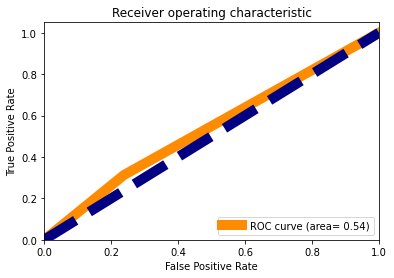

In [136]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(pred_test,test_y)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=10, label='ROC curve (area= %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

ROC Curve value is 54% so model is perforing well.

In [137]:
# GridsearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings('ignore')
alphav= {'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
grid= GridSearchCV(estimator=model,param_grid=alphav)
grid.fit(train_x,train_y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})
0.12810714274422472
1
{'alpha': 1}


Best parameters for Logistic Classifier 

In [138]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_x,train_y)
print('lr score:',lr.score(train_x,train_y))
rd=Ridge(alpha=1)
rd.fit(train_x,train_y)
print('Score:', rd.score(train_x,train_y))
print(rd.coef_)
print('Score:', rd.score(train_x,train_y))

lr score: 0.8061224489795918
Score: 0.20868365981798676
[-0.01449233  0.01938601  0.01197009 -0.0156517  -0.00324907  0.
  0.0116677   0.00368401 -0.00838428  0.01595772 -0.00385272 -0.01129112
 -0.01471726  0.00127192 -0.18727434  0.00547548  0.00334225 -0.01369824
  0.00556126 -0.01052548 -0.00979611  0.00525733  0.01189068  0.01739876
 -0.01034922  0.10735131 -0.05570455 -0.04784426 -0.01757879  0.00249175
  0.00153363]
Score: 0.20868365981798676


Logistic Regression score is 80.6%

## 1. Decision Tree Classifier

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
grid_param={
    'criterion':['gini','entropy']
  }
gd_sr=GridSearchCV(estimator=dtc,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)
gd_sr.fit(train_x,train_y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

print(round(best_result,2))

{'criterion': 'entropy'}
0.718079372856443
0.72


In [140]:
dtc= DecisionTreeClassifier(criterion='entropy')
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)

1.0

In [142]:
dtscore = cross_val_score(dtc,x,y,cv=9)
dts = dtscore.mean()
print('Cross Val Score:',dts*100)

Cross Val Score: 70.407180881187


Cross Val Score: 70.4%

In [144]:
#Predicted value
predtc = dtc.predict(test_x)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=accuracy_score(test_y,predtc)
confusion= confusion_matrix(test_y,predtc)
print("Accuracy of the model is: ",accuracy)
print("Confusion Matrix: ", confusion)

Accuracy of the model is:  0.6938775510204082
Confusion Matrix:  [[119  28]
 [ 32  17]]


Accuracy of the model is: 69.3%

In [145]:
# classification report
pred_test=dtc.predict(test_x)
print(classification_report(test_y,pred_test))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       147
           1       0.38      0.35      0.36        49

    accuracy                           0.69       196
   macro avg       0.58      0.58      0.58       196
weighted avg       0.69      0.69      0.69       196



classification_report of Decision Tree Classifier

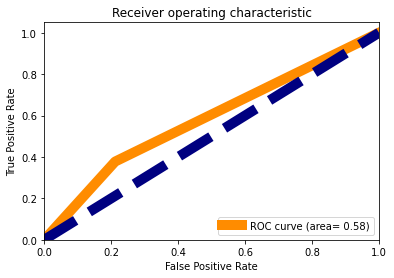

In [146]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(predtc,test_y)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=10, label='ROC curve (area= %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

ROC Curve value is 58% so model is perforing well.

## 2. SVM(SVC)

In [167]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
parameters={'kernel':['linear','rbf'],'C':[1,10]}
svc=svm.SVC()
clf= GridSearchCV(svc,parameters)
clf.fit(train_x,train_y)
print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


Best parameters for SVC

In [168]:
svc=svm.SVC(kernel='linear',C=1)
svc.fit(train_x,train_y)
svc.score(train_x,train_y)

0.8099489795918368

SV Score: 80.9%

In [169]:
#Predicted value
predsv = svc.predict(test_x)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=accuracy_score(test_y,predsv)
confusion=confusion_matrix(test_y,predsv)
print("Accuracy of the model is: ",accuracy)
print("Confusion Matrix: ", confusion)

Accuracy of the model is:  0.8061224489795918
Confusion Matrix:  [[122  25]
 [ 13  36]]


Accuracy of the model is: 80.6%

In [170]:
svscore = cross_val_score(svc,x,y,cv=9)
svs = svscore.mean()
print('Cross Val Score:',svs*100)

Cross Val Score: 80.91988522671501


Cross Val Score: 80.9%

In [171]:
#classification_report
pred_test=svc.predict(test_x)
print(classification_report(test_y,pred_test))

              precision    recall  f1-score   support

           0       0.90      0.83      0.87       147
           1       0.59      0.73      0.65        49

    accuracy                           0.81       196
   macro avg       0.75      0.78      0.76       196
weighted avg       0.83      0.81      0.81       196



classification_report of SVC

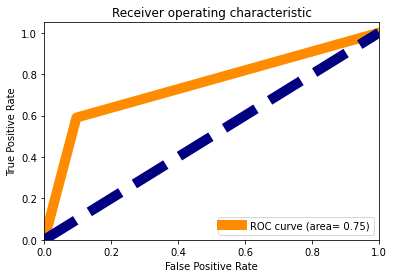

In [172]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(predsv,test_y)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=10, label='ROC curve (area= %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

ROC Curve value is 75% so model is perforing well.

## 3. Random Forest Classifier

In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(train_x,train_y)
    
print(clf.best_params_)

{'max_depth': 10, 'max_features': 11}


Best parameters for Random Forest Classifier 

In [154]:
rfc= RandomForestClassifier(max_depth=10,max_features=11)
rfc.fit(train_x,train_y)
rfc.score(train_x,train_y)

0.9834183673469388

In [155]:
#Predicted value
predrfc = rfc.predict(test_x)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=accuracy_score(test_y,predrfc)
confusion=confusion_matrix(test_y,predrfc)
print("Accuracy of the model is: ",accuracy)
print("Confusion Matrix: ", confusion)

Accuracy of the model is:  0.7908163265306123
Confusion Matrix:  [[129  18]
 [ 23  26]]


Accuracy of the model is: 79%

In [156]:
rfscore = cross_val_score(rfc,x,y,cv=9)
rfs = rfscore.mean()
print('Cross Val Score:',rfs*100)

Cross Val Score: 78.87737380601804


Cross Val Score:78.8%

In [157]:
#classification_report
pred_test=rfc.predict(test_x)
print(classification_report(test_y,pred_test))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       147
           1       0.59      0.53      0.56        49

    accuracy                           0.79       196
   macro avg       0.72      0.70      0.71       196
weighted avg       0.78      0.79      0.79       196



classification_report of RandomForestClassifier

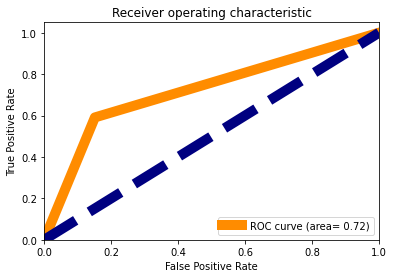

In [158]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(predrfc,test_y)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=10, label='ROC curve (area= %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

ROC Curve value is 72% so model is performing well.

## 4. KNeighbors Classifier

In [159]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

knc=KNeighborsClassifier()

parameters = {'n_neighbors':list(range(0,10)),
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
              }

clf = GridSearchCV(knc, parameters, cv=9, scoring='accuracy')

clf.fit(train_x,train_y)
    
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'uniform'}


Best parameters for KNeighborsClassifier

In [160]:
knc= KNeighborsClassifier(algorithm='auto',n_neighbors=8,weights='uniform')
knc.fit(train_x,train_y)
knc.score(train_x,train_y)

0.7882653061224489

In [161]:
#Predicted value
predknc = knc.predict(test_x)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=accuracy_score(test_y,predknc)
confusion=confusion_matrix(test_y,predknc)
print("Accuracy of the model is: ",accuracy)
print("Confusion Matrix: ", confusion)

Accuracy of the model is:  0.7346938775510204
Confusion Matrix:  [[140   7]
 [ 45   4]]


Accuracy of the model is: 73.4%

In [163]:
knscore = cross_val_score(knc,x,y,cv=9)
kns = knscore.mean()
print('Cross Val Score:',kns*100)

Cross Val Score: 75.40774719673803


Cross Val Score: 75.4%

In [164]:
#classification_report:
pred_test=knc.predict(test_x)
print(classification_report(test_y,pred_test))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84       147
           1       0.36      0.08      0.13        49

    accuracy                           0.73       196
   macro avg       0.56      0.52      0.49       196
weighted avg       0.66      0.73      0.67       196



classification_report of KNeighborsClassifier

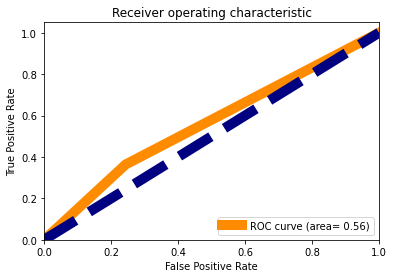

In [165]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(predknc,test_y)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=10, label='ROC curve (area= %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

ROC Curve value is 56% so model is perforing well.

## Best Model is SVC as it has Accuracy of 80.6% and Cross val score of 80.9%

# Model saving:

In [173]:
import pickle
filename = 'Fraud_Pred.pkl'
pickle.dump(svc, open(filename, 'wb'))

## Accuracy:

In [174]:
loaded_model = pickle.load(open('Fraud_Pred.pkl', 'rb'))
result = loaded_model.score(test_x, test_y)
print(result)

0.8061224489795918


Accuracy of 80.6% so model performing well

## Conclusion:

In [175]:
import numpy as np
a=np.array(test_y)
predsv =np.array(svc.predict(test_x))
df_com=pd.DataFrame({"original":a, "predicted": predsv},index=range(len(a)))
df_com

,original,predicted
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
191,1,1
192,0,0
193,1,1
194,0,1


Model is able to predict value somewhat equal to actual value as the accuracy of model is 80.6%